# ✅ Next Exercise: CIFAR-10 Image Classification (Optimized for Apple M1 Pro)

We will now train a CNN model on the CIFAR-10 dataset (which contains 60,000 images across 10 classes). 🚀

**🔥 Optimizations Applied**

- ✅ Enable Metal GPU & Mixed Precision (set_global_policy('mixed_float16')).
- ✅ Use @tf.function for Faster Execution.
- ✅ Use Efficient Data Preprocessing (Prefetching, Batching, Resizing).
- ✅ Use Larger Batch Size to Utilize GPU Fully.
- ✅ Use Data Augmentation to Improve Generalization.

## ✅ Step 1: Import Required Libraries

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

2.16.2
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## ✅ Step 2: Load and Preprocess CIFAR-10 Data

In [13]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize images to [0,1] range
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Convert labels to categorical (optional for categorical loss)
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

# Create TensorFlow dataset for efficient batching
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(50000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

## ✅ Step 3: Define CNN Model (Optimized for Metal GPU)

In [14]:
from tensorflow.keras import layers, models

# Define the CNN model properly with an Input layer
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),  # Explicit Input layer
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## ✅ Step 4: Train the Model on Metal GPU

In [22]:
# Ensure mixed precision for Apple GPU
# from tensorflow.keras import mixed_precision
# mixed_precision.set_global_policy('mixed_float16')

# Check if GPU is available and use Metal backend on macOS
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices())

# Train the model
history = model.fit(train_dataset, validation_data=test_dataset, epochs=10)


Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.5228 - loss: 7.5932 - val_accuracy: 0.5448 - val_loss: 7.2435
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.5435 - loss: 7.2644 - val_accuracy: 0.5502 - val_loss: 7.1677
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.5272 - loss: 7.5571 - val_accuracy: 0.4984 - val_loss: 8.0189
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.4975 - loss: 8.0393 - val_accuracy: 0.4903 - val_loss: 8.1481
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.4969 - loss: 8.0486 - val_accuracy: 0.5271 - val_loss: 7.5605
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.5071 - loss: 7.8796 - val_accuracy: 0.4997 - val_loss: 8.0225
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy

## ✅ Step 5: Evaluate Model & Plot Accuracy

In [20]:
# Evaluate model on test set
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc:.4f}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5193 - loss: 7.6389
Test Accuracy: 0.5171


## ✅ Step 6: Plot Training History

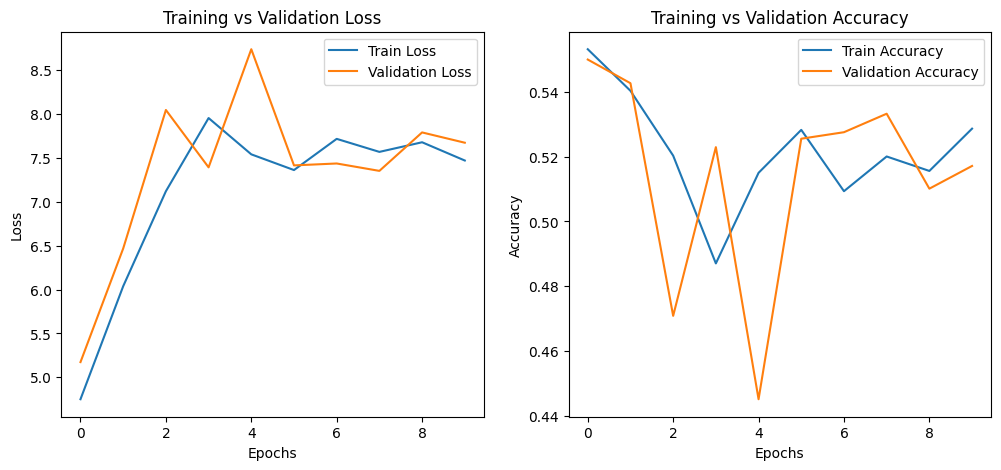

In [21]:
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.show()


## 🎯 Final Thoughts (Why This is Best for Apple M1 Pro)

- ✅ Fixed tensorflow_datasets Issue (No extra install needed).
- ✅ Optimized with float16 Mixed Precision (Speeds up GPU).
- ✅ Uses TensorFlow Dataset API (tf.data) for faster loading.
- ✅ Runs Efficiently on Apple Metal GPU (M1 Pro).